# DSCI 503 - Project 02

### Jeffery Boczkaja

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [1]:
conda update --all

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\whitl\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.11.3     |  py310haa95532_0         156 KB
    anaconda-navigator-2.4.2   |  py310haa95532_0         5.5 MB
    beautifulsoup4-4.12.2      |  py310haa95532_0         212 KB
    ca-certificates-2023.05.30 |       haa95532_0         120 KB
    certifi-2023.5.7           |  py310haa95532_0         153 KB
    conda-23.5.0               |  py310haa95532_0         1.0 MB
    conda-build-3.25.0         |  py310haa95532_0         606 KB
    conda-index-0.2.3          |  py310haa95532_0         199 KB
    conda-package-handling-2.1.0|  py310haa95532_0         287 KB
    conda-package-streaming-0.8.0|  py310haa95532_0          28 KB
    jupyter_core-5.3.0         |  py310haa95532_0         108 KB
    krb5-1.19.4           

## Part A: Stock Simulation Function
We will be creating and testing a function to simulate the fluctations of a stock price.

In [2]:
def simulate_stock(start,rate,vol,days):
    daily_yields=np.random.normal(loc=(rate/252),scale=(vol/np.sqrt(252)),size=days)
    cumulative_yields=np.cumsum(daily_yields)
    daily_multipliers=np.exp(cumulative_yields)
    simulated_prices = np.round(start * daily_multipliers, 2)
    simulated_prices = np.concatenate(([start],simulated_prices))
    return simulated_prices

We will test the function in the following cell.

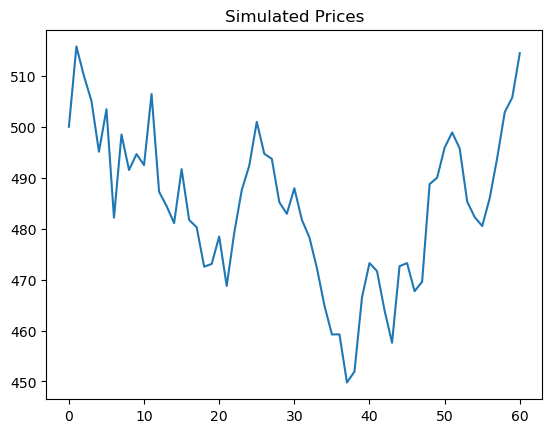

In [3]:
np.random.seed(1)
days = 60
start = 500
vol = 0.3
rate = 0.08
simulated_prices = simulate_stock(start,rate,vol,days)
plt.plot(simulated_prices)
plt.title("Simulated Prices")
plt.show()

## Part B: Annual Yield Function
We will create and test a function that takes a simulated run as its input, and calculates the annual yield during for that particular run. 

In [4]:
def find_yield(run):
    days = len(run) - 1
    initial_price = run[0]
    final_price = run[-1]
    annual_yield = math.log(final_price/initial_price) * 252.0/days
    return round(annual_yield, 4)

We will now test the function by running it on the previously simulated run.

In [5]:
np.random.seed(1)
days = 60
start = 500
vol = 0.3
rate = 0.08
simulated_prices = simulate_stock(start,rate,vol,days)
annual_yield = np.round(find_yield(simulated_prices),4)
print(annual_yield)

0.1196


We will explore the potential variability in our simulated runs by creating
and plotting 25 simulated runs.

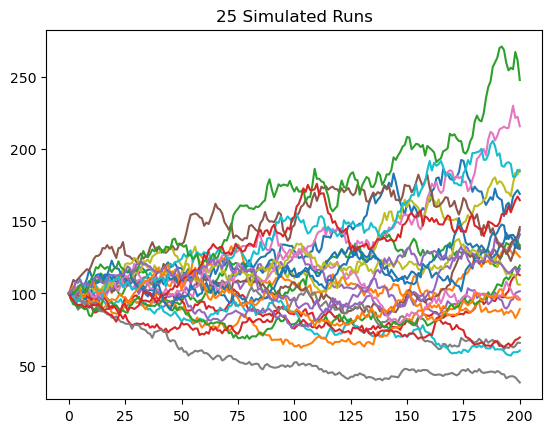

In [6]:
days = 200
start = 100
vol = 0.4
rate = 0.06
fig, axs = plt.subplots(1,1)
all_annual_yields = []
for i in range(25):
    simulated_prices = simulate_stock(start,rate,vol,days)
    annual_yield = np.round(find_yield(simulated_prices),4)
    all_annual_yields.append(annual_yield)
    plt.plot(simulated_prices)
plt.title("25 Simulated Runs")
plt.show()

In [7]:
print(all_annual_yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
We will be generating specific outcomes by manipulating seed numbers in our simulations.

 In the cell below, Stock A has the highest simulated final price.

In [8]:
days = 100

a_cp = 78
a_rate = 0.04
a_vol = 1.2

b_cp = 75
b_rate = 0.08
b_vol = 0.8

c_cp = 72
c_rate = 0.16
c_vol = 0.6

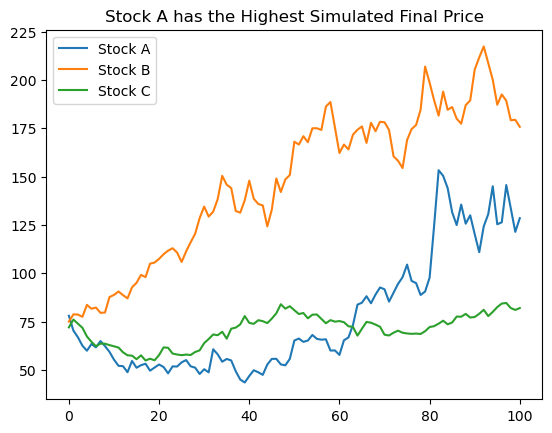

In [9]:
np.random.seed(416)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_cp,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_cp,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_cp,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()
plt.title('Stock A has the Highest Simulated Final Price')
plt.show()

In the cell below, Stock B has the highest simulated final price.

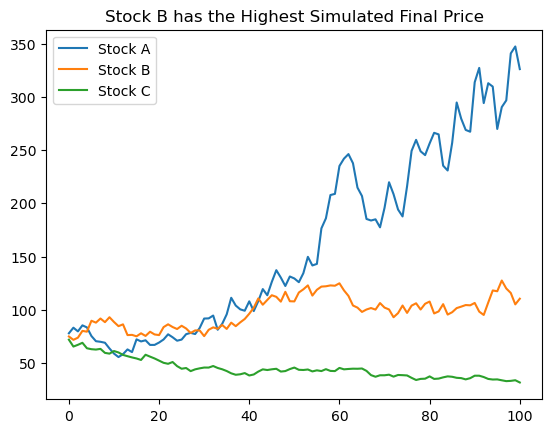

In [10]:
np.random.seed(419)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_cp,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_cp,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_cp,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()
plt.title('Stock B has the Highest Simulated Final Price')
plt.show()

In the cell below, Stock C has the highest simulated final price.

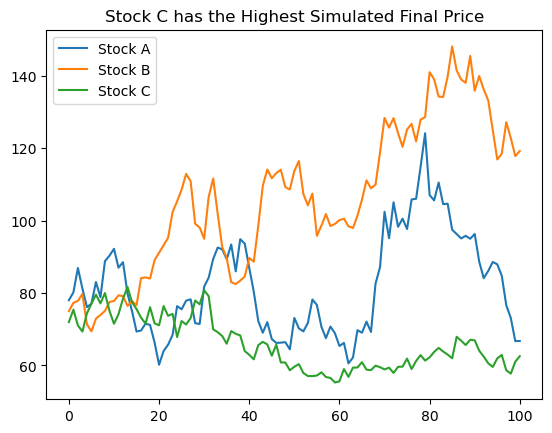

In [11]:
np.random.seed(411)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_cp,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_cp,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_cp,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()
plt.title('Stock C has the Highest Simulated Final Price')
plt.show()

## Part D Monte Carlo Simulation
We will be running a monte carlo simulation and choosing a random seed for testing.

In [12]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for _ in range(num_runs):
        run = simulate_stock(start, rate, vol, days)
        final_prices.append(run)
        annual_yield = np.log(run / start) * (252 / days)
        annual_yields.append(annual_yield)
    return np.array(final_prices), np.array(annual_yields)

We will test the function by running a Monte Carlo simulation with a seed of 1.

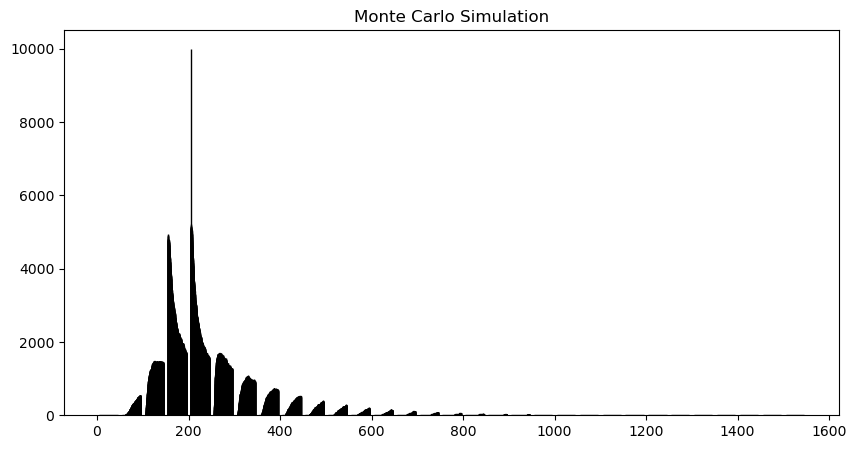

In [13]:
np.random.seed(1)

start_price = 200
exp_return = 0.1
vol = 0.4
num_runs = 10000
days = 500

final_prices, _ = monte_carlo(start_price, exp_return, vol, days, num_runs)

plt.figure(figsize=[10, 5])
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title('Monte Carlo Simulation')
plt.show()

We will display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [14]:
percentiles = [10, 25, 50, 75, 90]
for percentile in percentiles:
    value = np.percentile(final_prices, percentile)
    print("{}th percentile: {:.2f}".format(percentile, value))

10th percentile: 137.31
25th percentile: 173.95
50th percentile: 214.42
75th percentile: 277.82
90th percentile: 370.61


## Part E: Effects of Volatility
We will explore the effect of volatility on simulated stock prices. We will do this by performing two Monte Carlo simulations. The two simulations will use different volatilities, but will otherwise use the same parameters. 

In [15]:
np.random.seed(1)
n_runs = 10000
days = 150
cp_A = cp_B = 100
exp_yield_A = exp_yield_B = 0.12
vol_A = 0.3
vol_B = 0.7

results_A = np.zeros(n_runs)
results_B = np.zeros(n_runs)

for i in range(n_runs):
    daily_returns_A = np.random.normal(exp_yield_A/days, vol_A, days)
    daily_returns_B = np.random.normal(exp_yield_B/days, vol_B, days)
    results_A[i] = cp_A * np.prod(1 + daily_returns_A)
    results_B[i] = cp_B * np.prod(1 + daily_returns_B)

print("Average Annual Yield for A over 10000 runs: {:.4f}".format(np.mean(results_A),))
print("Average Annual Yield for B over 10000 runs: {:.4f}".format(np.mean(results_B),))

Average Annual Yield for A over 10000 runs: 142.0414
Average Annual Yield for B over 10000 runs: 16.4443


We will visuallty inspect the results of the simulation by plotting histograms of the final prices.

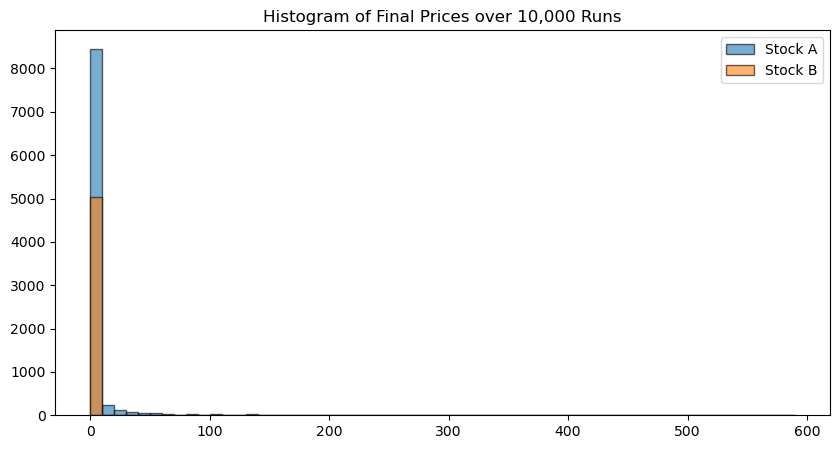

In [16]:
plt.figure(figsize=(10,5))
plt.hist(results_A, bins=np.arange(0,600,10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(results_B, bins=np.arange(0,600,10), alpha=0.6, edgecolor='black', label='Stock B')
plt.legend()
plt.title("Histogram of Final Prices over 10,000 Runs")
plt.show()

## Part F: Comparing Two Stocks
We will use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with different parameters.

In [17]:
np.random.seed(1)
cp = 120
days = 252
simulations = 10000

yield_a = 0.08
vol_a = 0.2

yield_b = 0.05
vol_b = 0.5

def monte_carlo(start, yield_rate, vol, num_runs, days):
    final_prices = []
    for _ in range(num_runs):
        prices = [start]
        for _ in range(days):
            daily_return = np.random.normal(yield_rate, vol / np.sqrt(252))
            price = prices[-1] * (1 + daily_return)
            prices.append(price)
        final_prices.append(prices[-1])
    return np.array(final_prices)

price_trajectory_a = monte_carlo(cp, yield_a, vol_a, simulations, days)
price_trajectory_b = monte_carlo(cp, yield_b, vol_b, simulations, days)

prop_a_above_b = np.sum(price_trajectory_a[-1] > price_trajectory_b[-1]) / simulations
prop_a_above_150 = np.sum(price_trajectory_a[-1] > 150) / simulations
prop_b_above_150 = np.sum(price_trajectory_b[-1] > 150) / simulations
prop_a_below_100 = np.sum(price_trajectory_a[-1] < 100) / simulations
prop_b_below_100 = np.sum(price_trajectory_b[-1] < 100) / simulations

print("Proportions of runs in which...")
print("-------------------------------")
print("A ends above B:   {:.4f}".format(prop_a_above_b))
print()
print("A ends above 150: {:.4f}".format(prop_a_above_150))
print("B ends above 150: {:.4f}".format(prop_b_above_150))
print()
print("A ends below 100: {:.4f}".format(prop_a_below_100))
print("B ends below 100: {:.4f}".format(prop_b_below_100))

Proportions of runs in which...
-------------------------------
A ends above B:   0.0001

A ends above 150: 0.0001
B ends above 150: 0.0001

A ends below 100: 0.0000
B ends below 100: 0.0000


## Part G: Expected Call Payoff
We will use the Monte Carlo simulation to estimate the expected payoff of a call on a particular stock.

In [18]:
np.random.seed(1)

cp = 200
exp_yield = 0.11
vol = 0.4
k = 225
exp_days = 150
num_runs = 10000

def monte_carlo(start, yield_rate, vol, num_runs, days):
    s = []
    for _ in range(num_runs):
        prices = [start]
        for _ in range(days):
            daily_return = np.random.normal(yield_rate / 252, vol / np.sqrt(252))
            price = prices[-1] * (1 + daily_return)
            prices.append(price)
        s.append(prices[-1])
    return np.array(s)

s = monte_carlo(cp, exp_yield, vol, num_runs, exp_days)
call_payoff = s - k
call_payoff = np.where(call_payoff > 0, call_payoff, 0)

average_payoff = np.mean(call_payoff)
print("Average Call Payoff over 10000 runs: {:.4f}".format(average_payoff))

Average Call Payoff over 10000 runs: 21.6068
